## Survival Predication of Pediatric Brain Cancer Patients
###By Teresa Cameron 

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import re as re
import numpy as np
import seaborn as sns

In [92]:
# Read data
df = pd.read_excel('https://github.com/tmcamero/ML_Project/blob/main/pediatric_brain_patients.xlsx?raw=true')

In [93]:
# View data
df.head()

,Patient ID,Age recode with <1 year olds,Age recode with single ages and 85+,Sex,Year of diagnosis,"Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)",Survival months,Survival months flag,SEER Brain and CNS Recode,Primary Site - labeled,Grade (thru 2017),Laterality,Median household income inflation adj to 2019,Rural-Urban Continuum Code,SEER cause-specific death classification
0,3703,01-04 years,02 years,Female,2001,Non-Hispanic White,218,Complete dates are available and there are mor...,1.1.4 Oligodendroglioma,C71.8-Overlapping lesion of brain,Moderately differentiated; Grade II,Right - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,Alive or dead of other cause
1,561644,15-19 years,17 years,Female,2002,Non-Hispanic White,8,Incomplete dates are available and there canno...,1.1.2 Glioblastoma,C71.8-Overlapping lesion of brain,Unknown,Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,Dead (attributable to this cancer dx)
2,753631,10-14 years,14 years,Male,2008,Non-Hispanic Asian or Pacific Islander,18,Complete dates are available and there are mor...,"1.1.9 Glioma, unspecified",C71.1-Frontal lobe,Undifferentiated; anaplastic; Grade IV,Right - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,Dead (attributable to this cancer dx)
3,779565,10-14 years,12 years,Male,2000,Non-Hispanic White,11,Complete dates are available and there are mor...,1.1.2 Glioblastoma,C71.8-Overlapping lesion of brain,Undifferentiated; anaplastic; Grade IV,Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,Dead (attributable to this cancer dx)
4,779588,01-04 years,03 years,Female,2000,Hispanic (All Races),230,Complete dates are available and there are mor...,1.1.6 Other astrocytic tumors,"C71.5-Ventricle, NOS",Unknown,Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,Alive or dead of other cause


In [94]:
# Clean data

# Year Variable
# Rename Year of Diagnosis column
df.rename(columns = {'Year of diagnosis' : 'Year_Diagnosed'}, inplace = True)

# Survival Months Variable
# Rename survival months column
df.rename(columns = {'Survival months' : 'Survival_Months'}, inplace = True)

# COD Variable
# Rename column
df.rename(columns = {'SEER cause-specific death classification' : 'Cause_of_Death'}, inplace = True)
# Rename COD variables
clean_cod_def = {"Cause_of_Death":
            {"Alive or dead of other cause": 'Survived', 
            "Dead (attributable to this cancer dx)": 'Deceased',
            "Dead (missing/unknown COD)": 'Unknown',
            "N/A not seq 0-59": 'Unknown'}}
df = df.replace(clean_cod_def)

# Age Variable
# Extract number from age variable
df['Age'] = df['Age recode with single ages and 85+'].str.extract('(\d+)').astype(int)
# Change type to int
df['Age'] = df['Age'].astype('int')

# Race_origin variable
# Rename column
df.rename(columns = {'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)' : 'Race_Origin_Recode'}, inplace = True)

# Median Income Variable
# Rename Column
df.rename(columns = {'Median household income inflation adj to 2019' : 'Med_House_Inc'}, inplace = True)

# Rural-Urban Code
# Rename Column
df.rename(columns = {'Rural-Urban Continuum Code' : 'Rural_Urban_Code'}, inplace = True)

# Grade (thru 2017)
# Rename Column
df.rename(columns = {'Grade (thru 2017)' : 'Grade'}, inplace = True)

# Record size of data
print(df.shape)


(12164, 16)


In [95]:
# Create column that removes number code from Tumor Type
def search_words(text):
    result = re.findall(r'\b[^\d\W]+\b', text)
    return " ".join(result)

df['Tumor_Type']=df['SEER Brain and CNS Recode'].apply(lambda x : search_words(x))
df['Primary_Site']=df['Primary Site - labeled'].apply(lambda x : search_words(x))

In [96]:
df.head()

,Patient ID,Age recode with <1 year olds,Age recode with single ages and 85+,Sex,Year_Diagnosed,Race_Origin_Recode,Survival_Months,Survival months flag,SEER Brain and CNS Recode,Primary Site - labeled,Grade,Laterality,Med_House_Inc,Rural_Urban_Code,Cause_of_Death,Age,Tumor_Type,Primary_Site
0,3703,01-04 years,02 years,Female,2001,Non-Hispanic White,218,Complete dates are available and there are mor...,1.1.4 Oligodendroglioma,C71.8-Overlapping lesion of brain,Moderately differentiated; Grade II,Right - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,Survived,2,Oligodendroglioma,Overlapping lesion of brain
1,561644,15-19 years,17 years,Female,2002,Non-Hispanic White,8,Incomplete dates are available and there canno...,1.1.2 Glioblastoma,C71.8-Overlapping lesion of brain,Unknown,Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,Deceased,17,Glioblastoma,Overlapping lesion of brain
2,753631,10-14 years,14 years,Male,2008,Non-Hispanic Asian or Pacific Islander,18,Complete dates are available and there are mor...,"1.1.9 Glioma, unspecified",C71.1-Frontal lobe,Undifferentiated; anaplastic; Grade IV,Right - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,Deceased,14,Glioma unspecified,Frontal lobe
3,779565,10-14 years,12 years,Male,2000,Non-Hispanic White,11,Complete dates are available and there are mor...,1.1.2 Glioblastoma,C71.8-Overlapping lesion of brain,Undifferentiated; anaplastic; Grade IV,Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,Deceased,12,Glioblastoma,Overlapping lesion of brain
4,779588,01-04 years,03 years,Female,2000,Hispanic (All Races),230,Complete dates are available and there are mor...,1.1.6 Other astrocytic tumors,"C71.5-Ventricle, NOS",Unknown,Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,Survived,3,Other astrocytic tumors,Ventricle NOS


In [97]:
# Examine data types
print(df.dtypes)

Patient ID                              int64
Age recode with <1 year olds           object
Age recode with single ages and 85+    object
Sex                                    object
Year_Diagnosed                          int64
Race_Origin_Recode                     object
Survival_Months                        object
Survival months flag                   object
SEER Brain and CNS Recode              object
Primary Site - labeled                 object
Grade                                  object
Laterality                             object
Med_House_Inc                          object
Rural_Urban_Code                       object
Cause_of_Death                         object
Age                                     int64
Tumor_Type                             object
Primary_Site                           object
dtype: object


### Examine Variables and Create Visualizations

In [98]:
# Examine Cause of Death
df.Cause_of_Death.value_counts()

Survived    8785
Deceased    3278
Unknown      101
Name: Cause_of_Death, dtype: int64

In [99]:
# Remove Unknown Cause of Death
clean_cod = pd.DataFrame(df.loc[df['Cause_of_Death'] != 'Unknown'])
# Record size of data
clean_cod.shape


(12063, 18)

In [100]:
# color for graphs
pal = ["#2d66f1", "#f1b82d"]


In [101]:
# Create crosstab showing the year and number of patients by survival
cod_tab = pd.crosstab(clean_cod['Year_Diagnosed'], columns = clean_cod['Cause_of_Death'])
cod_tab


Cause_of_Death,Deceased,Survived
Year_Diagnosed,,
2000,190,393
2001,217,396
2002,220,398
2003,181,422
2004,185,410
2005,183,372
2006,167,400
2007,193,428
2008,199,442


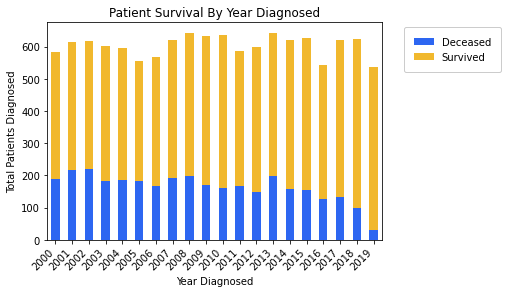

In [102]:
# Create stacked bar graph of survival by year
cod_tab.plot(kind = 'bar', stacked = True, rot = 0, color = pal)
plt.ylabel('Total Patients Diagnosed')
plt.title('Patient Survival By Year Diagnosed')
plt.xlabel('Year Diagnosed')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'upper left', fancybox = True, framealpha = 1, 
           borderpad = 1)

In [103]:
# Create crosstab showing the year and number of patients by survival percentages
cod_tab2 = pd.crosstab(clean_cod['Year_Diagnosed'], columns = clean_cod['Cause_of_Death'], normalize = 'index')
cod_tab2 = cod_tab2.rename_axis(None, axis = 1)
cod_tab2 = cod_tab2.rename_axis(None)
cod_tab2.style.format('{:.2%}')


,Deceased,Survived
2000,32.59%,67.41%
2001,35.40%,64.60%
2002,35.60%,64.40%
2003,30.02%,69.98%
2004,31.09%,68.91%
2005,32.97%,67.03%
2006,29.45%,70.55%
2007,31.08%,68.92%
2008,31.05%,68.95%
2009,26.81%,73.19%


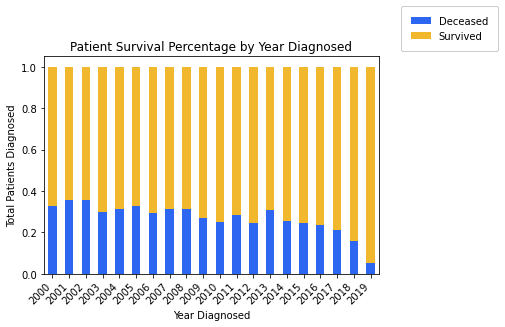

In [104]:
# Create bar graph showing survival percentages
cod_tab2.plot(kind = 'bar', stacked = True, rot = 0 , color = pal)
plt.ylabel('Total Patients Diagnosed')
plt.title('Patient Survival Percentage by Year Diagnosed')
plt.xlabel('Year Diagnosed')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'lower left', fancybox = True, framealpha = 1, 
           borderpad =1)
plt.show()

In [105]:
# Remove certain years data from set
clean_cod = clean_cod[clean_cod.Year_Diagnosed >= 2003]
clean_cod = clean_cod[clean_cod.Year_Diagnosed <= 2018]
# Record size of data
clean_cod.shape

(9714, 18)

In [106]:
clean_cod['Year_Diagnosed'].value_counts()

2013    643
2008    641
2010    637
2009    634
2015    628
2018    622
2007    621
2014    621
2017    620
2003    603
2012    598
2004    595
2011    586
2006    567
2005    555
2016    543
Name: Year_Diagnosed, dtype: int64

In [107]:
# Number of Survived and Deceased
clean_cod['Cause_of_Death'].value_counts()

Survived    7092
Deceased    2622
Name: Cause_of_Death, dtype: int64

In [108]:
# Create crosstab of the primary site and patient survival
ctype_table = pd.crosstab(clean_cod['Primary_Site'], columns = clean_cod['Cause_of_Death'], margins = True)
ctype_table = ctype_table.sort_values(by = 'All', ascending = False )
ctype_table = ctype_table.head(11)
ctype_table = ctype_table.iloc[1:,:-1]
ctype_table = ctype_table.rename_axis(None, axis = 1)
ctype_table = ctype_table.rename_axis(None)
ctype_table

,Deceased,Survived
Cerebellum NOS,444,2141
Brain stem,915,1159
Brain NOS,214,976
Cerebrum,258,591
Frontal lobe,218,554
Temporal lobe,147,566
Ventricle NOS,150,480
Overlapping lesion of brain,161,255
Parietal lobe,93,255
Occipital lobe,22,115


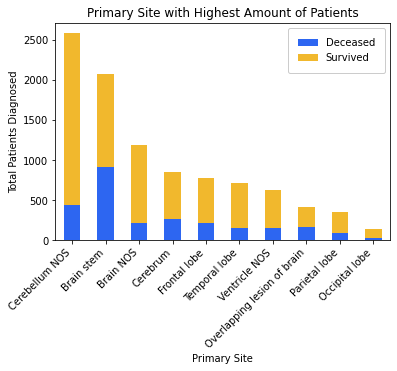

In [109]:
# Create bar graph showing survival by primary site
ctype_table.plot(kind = 'bar', stacked = True, rot = 0, color = pal)
plt.ylabel('Total Patients Diagnosed')
plt.title('Primary Site with Highest Amount of Patients')
plt.xlabel('Primary Site')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(fancybox = True, framealpha = 1, borderpad = 1)

In [110]:
# Create table showing the survival percentage by primary site
ctype_table_norm = pd.crosstab(clean_cod['Primary_Site'], columns = clean_cod['Cause_of_Death'], normalize = 'index')
ctype_table_norm = ctype_table_norm.sort_values(by = 'Deceased', ascending = False )
ctype_table_norm = ctype_table_norm.rename_axis(None, axis = 1)
ctype_table_norm = ctype_table_norm.rename_axis(None)
ctype_table_norm.style.format('{:.2%}')


,Deceased,Survived
Brain stem,44.12%,55.88%
Overlapping lesion of brain,38.70%,61.30%
Cerebrum,30.39%,69.61%
Frontal lobe,28.24%,71.76%
Parietal lobe,26.72%,73.28%
Ventricle NOS,23.81%,76.19%
Temporal lobe,20.62%,79.38%
Brain NOS,17.98%,82.02%
Cerebellum NOS,17.18%,82.82%
Occipital lobe,16.06%,83.94%


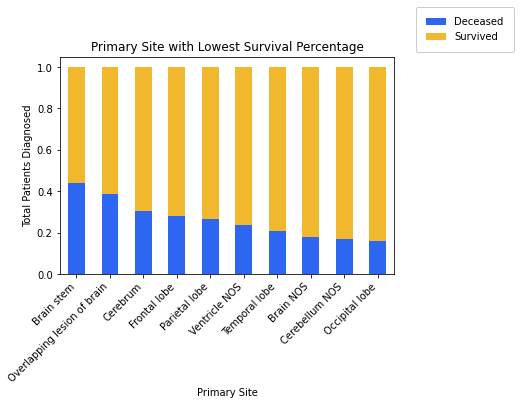

In [111]:
# Create bar graph showing survival percentages
ctype_table_norm2 = ctype_table_norm.head(10)
ctype_table_norm2.plot(kind = 'bar', stacked = True, rot = 0 , color = pal)
plt.ylabel('Total Patients Diagnosed')
plt.title('Primary Site with Lowest Survival Percentage')
plt.xlabel('Primary Site')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'lower left', fancybox = True, framealpha = 1, 
           borderpad =1)
plt.show()

In [112]:
# Create crosstab of the type of tumor and patient survival
ctype_table = pd.crosstab(clean_cod['Tumor_Type'], columns = clean_cod['Cause_of_Death'], margins = True)
ctype_table = ctype_table.sort_values(by = 'All', ascending = False )
#ctype_table = ctype_table.head(11)
ctype_table = ctype_table.iloc[1:,:-1]
ctype_table = ctype_table.rename_axis(None, axis = 1)
ctype_table = ctype_table.rename_axis(None)
ctype_table


,Deceased,Survived
Other astrocytic tumors,94,2731
Embryonal tumors,707,1350
Glioma unspecified,622,832
Diffuse astrocytoma and anaplastic astrocytoma,359,724
Ependymal tumors,176,624
Glioblastoma,423,98
Other Malignant Brain ONS,111,341
Oligodendroglioma,30,192
Oligoastrocytoma,21,72
Choroid plexus tumors,32,60


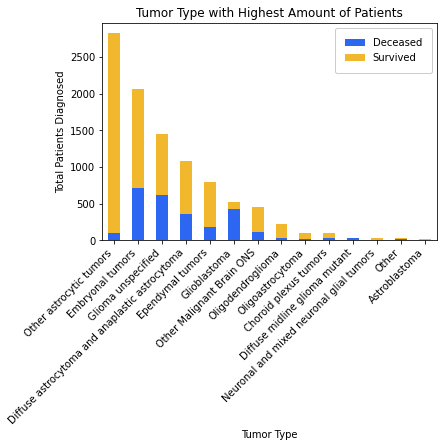

In [114]:
# Create bar graph showing survival by tumor type
ctype_table.plot(kind = 'bar', stacked = True, rot = 0, color = pal)
plt.ylabel('Total Patients Diagnosed')
plt.title('Tumor Type with Highest Amount of Patients')
plt.xlabel('Tumor Type')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(fancybox = True, framealpha = 1, borderpad = 1)

In [115]:
# Create table showing the survival percentage by cancer type
ctype_table_norm = pd.crosstab(clean_cod['Tumor_Type'], columns = clean_cod['Cause_of_Death'], normalize = 'index')
ctype_table_norm = ctype_table_norm.sort_values(by = 'Deceased', ascending = False )
ctype_table_norm = ctype_table_norm.rename_axis(None, axis = 1)
ctype_table_norm = ctype_table_norm.rename_axis(None)
ctype_table_norm.style.format('{:.2%}')

,Deceased,Survived
Glioblastoma,81.19%,18.81%
Diffuse midline glioma mutant,68.57%,31.43%
Other,50.00%,50.00%
Glioma unspecified,42.78%,57.22%
Choroid plexus tumors,34.78%,65.22%
Embryonal tumors,34.37%,65.63%
Diffuse astrocytoma and anaplastic astrocytoma,33.15%,66.85%
Other Malignant Brain ONS,24.56%,75.44%
Oligoastrocytoma,22.58%,77.42%
Ependymal tumors,22.00%,78.00%


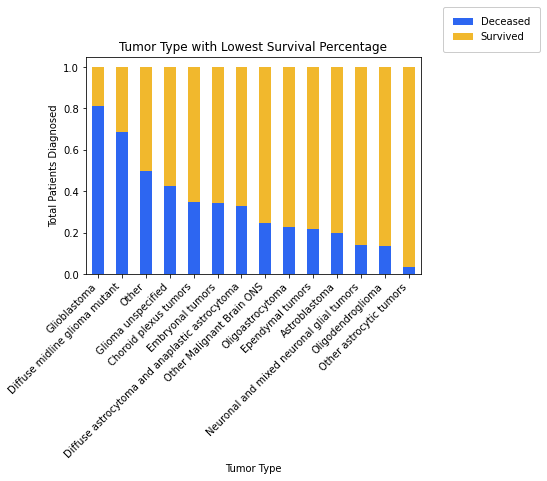

In [116]:
# Create bar graph showing survival percentages
ctype_table_norm2 = ctype_table_norm
ctype_table_norm2.plot(kind = 'bar', stacked = True, rot = 0 , color = pal)
plt.ylabel('Total Patients Diagnosed')
plt.title('Tumor Type with Lowest Survival Percentage')
plt.xlabel('Tumor Type')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'lower left', fancybox = True, framealpha = 1, 
           borderpad =1)
plt.show()

In [117]:
# Examine Race Recode Distribution
clean_cod['Race_Origin_Recode'].value_counts()

Non-Hispanic White                            5325
Hispanic (All Races)                          2478
Non-Hispanic Black                            1024
Non-Hispanic Asian or Pacific Islander         711
Non-Hispanic Unknown Race                      102
Non-Hispanic American Indian/Alaska Native      74
Name: Race_Origin_Recode, dtype: int64

In [118]:
# Create table showing the survival percentage by race
ctype_table_norm = pd.crosstab(clean_cod['Race_Origin_Recode'], columns = clean_cod['Cause_of_Death'], normalize = 'index')
ctype_table_norm = ctype_table_norm.sort_values(by = 'Deceased', ascending = False )
ctype_table_norm = ctype_table_norm.rename_axis(None, axis = 1)
ctype_table_norm = ctype_table_norm.rename_axis(None)
ctype_table_norm.style.format('{:.2%}')

,Deceased,Survived
Non-Hispanic Asian or Pacific Islander,33.05%,66.95%
Non-Hispanic Black,31.93%,68.07%
Hispanic (All Races),30.87%,69.13%
Non-Hispanic American Indian/Alaska Native,24.32%,75.68%
Non-Hispanic White,23.91%,76.09%
Non-Hispanic Unknown Race,3.92%,96.08%


In [119]:
# Remove Non-Hispanic Unknown Race
clean_cod = pd.DataFrame(clean_cod.loc[clean_cod['Race_Origin_Recode'] != 'Non-Hispanic Unknown Race'])
# Record size of data
clean_cod.shape


(9612, 18)

In [120]:
# Create table showing the survival percentage by race
ctype_table_norm = pd.crosstab(clean_cod['Race_Origin_Recode'], columns = clean_cod['Cause_of_Death'], normalize = 'index')
ctype_table_norm = ctype_table_norm.sort_values(by = 'Deceased', ascending = False )
ctype_table_norm = ctype_table_norm.rename_axis(None, axis = 1)
ctype_table_norm = ctype_table_norm.rename_axis(None)
ctype_table_norm.style.format('{:.2%}')

,Deceased,Survived
Non-Hispanic Asian or Pacific Islander,33.05%,66.95%
Non-Hispanic Black,31.93%,68.07%
Hispanic (All Races),30.87%,69.13%
Non-Hispanic American Indian/Alaska Native,24.32%,75.68%
Non-Hispanic White,23.91%,76.09%


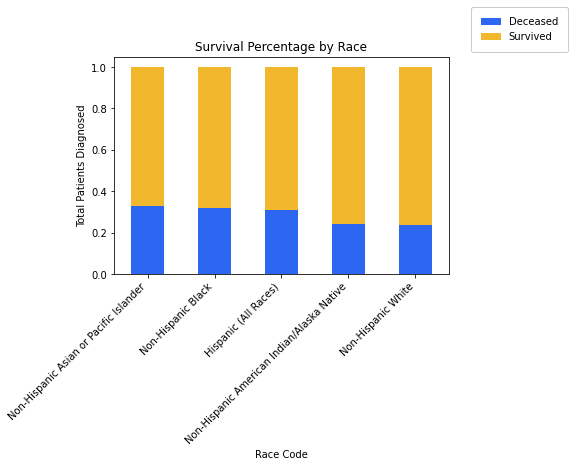

In [121]:
# Create bar graph showing survival percentages
ctype_table_norm2 = ctype_table_norm.head(10)
ctype_table_norm2.plot(kind = 'bar', stacked = True, rot = 0 , color = pal)
plt.ylabel('Total Patients Diagnosed')
plt.title('Survival Percentage by Race')
plt.xlabel('Race Code')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'lower left', fancybox = True, framealpha = 1, 
           borderpad =1)
plt.show()

In [122]:
# Examine Grade Distribution
clean_cod['Grade'].value_counts()

Unknown                                   6349
Undifferentiated; anaplastic; Grade IV    1363
Blank(s)                                   613
Moderately differentiated; Grade II        559
Well differentiated; Grade I               552
Poorly differentiated; Grade III           176
Name: Grade, dtype: int64

In [123]:
# View how many unknown grades
clean_cod['Grade'].value_counts(normalize = True) * 100

Unknown                                   66.052851
Undifferentiated; anaplastic; Grade IV    14.180191
Blank(s)                                   6.377445
Moderately differentiated; Grade II        5.815647
Well differentiated; Grade I               5.742821
Poorly differentiated; Grade III           1.831045
Name: Grade, dtype: float64

In [124]:
# Examine Laterality Distribution
clean_cod['Laterality'].value_counts()

Not a paired  site                                       5999
Right - origin of primary                                1691
Left - origin of primary                                 1558
Paired site, but no information concerning laterality     225
Bilateral, single primary                                  72
Paired site: midline tumor                                 36
Only one side - side unspecified                           31
Name: Laterality, dtype: int64

In [125]:
# Create table showing the survival percentage by laterality
ctype_table_norm = pd.crosstab(clean_cod['Laterality'], columns = clean_cod['Cause_of_Death'], normalize = 'index')
ctype_table_norm = ctype_table_norm.sort_values(by = 'Deceased', ascending = False )
ctype_table_norm = ctype_table_norm.rename_axis(None, axis = 1)
ctype_table_norm = ctype_table_norm.rename_axis(None)
ctype_table_norm.style.format('{:.2%}')

,Deceased,Survived
"Bilateral, single primary",51.39%,48.61%
Not a paired site,28.09%,71.91%
Left - origin of primary,27.66%,72.34%
Paired site: midline tumor,25.00%,75.00%
Right - origin of primary,23.77%,76.23%
"Paired site, but no information concerning laterality",21.78%,78.22%
Only one side - side unspecified,16.13%,83.87%


In [126]:
# Examine Median Household Income Distribution
clean_cod['Med_House_Inc'].value_counts()

$75,000+                                  2865
$65,000 - $69,999                         1657
$60,000 - $64,999                         1528
$70,000 - $74,999                          897
$50,000 - $54,999                          804
$55,000 - $59,999                          699
$45,000 - $49,999                          491
$40,000 - $44,999                          348
$35,000 - $39,999                          198
< $35,000                                  124
Unknown/missing/no match/Not 1990-2018       1
Name: Med_House_Inc, dtype: int64

In [127]:
# Create table showing the survival percentage by Median Household Income
ctype_table_norm = pd.crosstab(clean_cod['Med_House_Inc'], columns = clean_cod['Cause_of_Death'], normalize = 'index')
ctype_table_norm = ctype_table_norm.sort_values(by = 'Deceased', ascending = False )
ctype_table_norm = ctype_table_norm.rename_axis(None, axis = 1)
ctype_table_norm = ctype_table_norm.rename_axis(None)
ctype_table_norm.style.format('{:.2%}')

,Deceased,Survived
"$40,000 - $44,999",29.31%,70.69%
"$35,000 - $39,999",29.29%,70.71%
"$60,000 - $64,999",28.66%,71.34%
"$45,000 - $49,999",27.90%,72.10%
"$65,000 - $69,999",27.76%,72.24%
"$50,000 - $54,999",27.74%,72.26%
"$75,000+",26.67%,73.33%
"$55,000 - $59,999",26.61%,73.39%
"< $35,000",25.00%,75.00%
"$70,000 - $74,999",24.41%,75.59%


In [128]:
# Remove Unknown/missing data
clean_cod = pd.DataFrame(clean_cod.loc[clean_cod['Med_House_Inc'] != 'Unknown/missing/no match/Not 1990-2018'])
# Record size of data
clean_cod.shape


(9611, 18)

In [129]:
# Examine Rural Urban Code Distribution
clean_cod['Rural_Urban_Code'].value_counts()

Counties in metropolitan areas ge 1 million pop                 5694
Counties in metropolitan areas of 250,000 to 1 million pop      2160
Counties in metropolitan areas of lt 250 thousand pop            782
Nonmetropolitan counties adjacent to a metropolitan area         550
Nonmetropolitan counties not adjacent to a metropolitan area     405
Unknown/missing/no match (Alaska or Hawaii - Entire State)        20
Name: Rural_Urban_Code, dtype: int64

In [130]:
# Create table showing the survival percentage by Urban Code Distribution
ctype_table_norm = pd.crosstab(clean_cod['Rural_Urban_Code'], columns = clean_cod['Cause_of_Death'], normalize = 'index')
ctype_table_norm = ctype_table_norm.sort_values(by = 'Deceased', ascending = False )
ctype_table_norm = ctype_table_norm.rename_axis(None, axis = 1)
ctype_table_norm = ctype_table_norm.rename_axis(None)
ctype_table_norm.style.format('{:.2%}')

,Deceased,Survived
Unknown/missing/no match (Alaska or Hawaii - Entire State),35.00%,65.00%
Counties in metropolitan areas of lt 250 thousand pop,31.20%,68.80%
Nonmetropolitan counties not adjacent to a metropolitan area,28.15%,71.85%
Nonmetropolitan counties adjacent to a metropolitan area,27.27%,72.73%
Counties in metropolitan areas ge 1 million pop,27.05%,72.95%
"Counties in metropolitan areas of 250,000 to 1 million pop",26.06%,73.94%


In [131]:
# Examine Gender Distribution
clean_cod['Sex'].value_counts()

Male      5226
Female    4385
Name: Sex, dtype: int64

In [132]:
# Create table showing the survival percentage by Sex Distribution
ctype_table_norm = pd.crosstab(clean_cod['Sex'], columns = clean_cod['Cause_of_Death'], normalize = 'index')
ctype_table_norm = ctype_table_norm.sort_values(by = 'Deceased', ascending = False )
ctype_table_norm = ctype_table_norm.rename_axis(None, axis = 1)
ctype_table_norm = ctype_table_norm.rename_axis(None)
ctype_table_norm.style.format('{:.2%}')

,Deceased,Survived
Female,27.50%,72.50%
Male,27.02%,72.98%


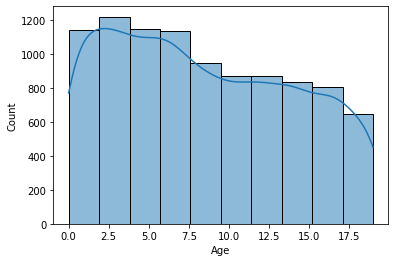

In [133]:
# Create histogram of age
sns.histplot(data = clean_cod, x = 'Age', bins = 10, kde = True)
plt.show()

In [135]:
# Bin age data based on Quantiles
clean_cod['Age_Bins'] = pd.qcut(clean_cod['Age'], 4)
clean_cod[['Age' , 'Age_Bins']].head()

,Age,Age_Bins
2,14,"(13.0, 19.0]"
33,19,"(13.0, 19.0]"
34,17,"(13.0, 19.0]"
45,14,"(13.0, 19.0]"
77,18,"(13.0, 19.0]"


In [136]:
# Examine Age Bin Distribution
clean_cod['Age_Bins'].value_counts()

(-0.001, 4.0]    2932
(13.0, 19.0]     2289
(8.0, 13.0]      2202
(4.0, 8.0]       2188
Name: Age_Bins, dtype: int64

In [137]:
# Change bins to labels
clean_cod['Age_Bins'] = pd.cut(x=clean_cod['Age'], bins = [-np.inf,4,8,13,19], labels = [1,2,3,4])
clean_cod['Age_Bins'].value_counts()

1    2932
4    2289
3    2202
2    2188
Name: Age_Bins, dtype: int64

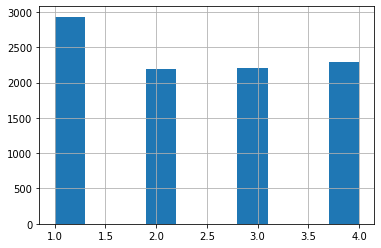

In [138]:
# Histogram of Age Bins
clean_cod['Age_Bins'].hist()

In [139]:
# Create table showing the survival percentage by age bin
ctype_table_norm = pd.crosstab(clean_cod['Age_Bins'], columns = clean_cod['Cause_of_Death'], normalize = 'index')
ctype_table_norm = ctype_table_norm.sort_values(by = 'Deceased', ascending = False )
ctype_table_norm = ctype_table_norm.rename_axis(None, axis = 1)
ctype_table_norm = ctype_table_norm.rename_axis(None)
ctype_table_norm.style.format('{:.2%}')

,Deceased,Survived
1,30.63%,69.37%
2,30.07%,69.93%
3,24.02%,75.98%
4,23.29%,76.71%


In [140]:
# Make copy of training set
clean_cod_copy = clean_cod.copy()
clean_cod_copy.head()

,Patient ID,Age recode with <1 year olds,Age recode with single ages and 85+,Sex,Year_Diagnosed,Race_Origin_Recode,Survival_Months,Survival months flag,SEER Brain and CNS Recode,Primary Site - labeled,Grade,Laterality,Med_House_Inc,Rural_Urban_Code,Cause_of_Death,Age,Tumor_Type,Primary_Site,Age_Bins
2,753631,10-14 years,14 years,Male,2008,Non-Hispanic Asian or Pacific Islander,18,Complete dates are available and there are mor...,"1.1.9 Glioma, unspecified",C71.1-Frontal lobe,Undifferentiated; anaplastic; Grade IV,Right - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,Deceased,14,Glioma unspecified,Frontal lobe,4
33,810082,15-19 years,19 years,Female,2006,Non-Hispanic White,4,Complete dates are available and there are mor...,1.2 Embryonal tumors,"C71.6-Cerebellum, NOS",Unknown,Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,Deceased,19,Embryonal tumors,Cerebellum NOS,4
34,815676,15-19 years,17 years,Male,2016,Hispanic (All Races),43,Complete dates are available and there are mor...,1.1.8 Ependymal tumors,"C71.9-Brain, NOS",Unknown,Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,Survived,17,Ependymal tumors,Brain NOS,4
45,836056,10-14 years,14 years,Male,2010,Non-Hispanic Black,115,Complete dates are available and there are mor...,1.1.6 Other astrocytic tumors,C71.1-Frontal lobe,Unknown,Left - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,Survived,14,Other astrocytic tumors,Frontal lobe,4
77,868414,15-19 years,18 years,Male,2015,Non-Hispanic White,53,Complete dates are available and there are mor...,1.1.6 Other astrocytic tumors,C71.2-Temporal lobe,Unknown,Right - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,Survived,18,Other astrocytic tumors,Temporal lobe,4


In [141]:
# Remove variable not needed for correlation
clean_cod_copy = pd.DataFrame(clean_cod_copy[['Sex', 'Race_Origin_Recode', 'Laterality', 'Med_House_Inc', 'Rural_Urban_Code', 'Cause_of_Death', 'Tumor_Type', 'Primary_Site', 'Age_Bins']])

In [142]:
clean_cod_copy.shape

(9611, 9)

In [143]:
# Encode columms with number variables
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame()

for i in clean_cod_copy.columns :
  data_encoded[i] = label.fit_transform(clean_cod_copy[i]) 


In [144]:
data_encoded

,Sex,Race_Origin_Recode,Laterality,Med_House_Inc,Rural_Urban_Code,Cause_of_Death,Tumor_Type,Primary_Site,Age_Bins
0,1,2,6,8,0,0,7,4,3
1,0,4,2,8,0,0,4,2,3
2,1,0,2,8,0,1,5,0,3
3,1,3,1,8,0,1,13,4,3
4,1,4,6,8,0,1,13,8,3
...,...,...,...,...,...,...,...,...,...
9606,0,4,2,6,1,1,2,1,3
9607,0,3,1,2,2,1,2,8,3
9608,0,4,5,8,0,1,7,3,3
9609,0,0,6,5,2,1,6,7,3


In [145]:
# Create function for Cramer's V Correlation Matrix
from scipy.stats import chi2_contingency

def cramers_V(var1,var2):
  crosstab = np.array(pd.crosstab(var1,var2, rownames = None)) # Build cross table
  
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [146]:
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

df

,Sex,Race_Origin_Recode,Laterality,Med_House_Inc,Rural_Urban_Code,Cause_of_Death,Tumor_Type,Primary_Site,Age_Bins
Sex,1.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00
Race_Origin_Recode,0.00,1.00,0.00,0.02,0.08,0.01,0.01,0.00,0.00
Laterality,0.00,0.00,1.00,0.00,0.00,0.00,0.02,0.11,0.01
Med_House_Inc,0.00,0.02,0.00,1.00,0.13,0.00,0.00,0.00,0.00
Rural_Urban_Code,0.00,0.08,0.00,0.13,1.00,0.00,0.00,0.00,0.00
Cause_of_Death,0.00,0.01,0.00,0.00,0.00,1.00,0.20,0.06,0.01
Tumor_Type,0.01,0.01,0.02,0.00,0.00,0.20,1.00,0.07,0.04
Primary_Site,0.00,0.00,0.11,0.00,0.00,0.06,0.07,1.00,0.02
Age_Bins,0.00,0.00,0.01,0.00,0.00,0.01,0.04,0.02,1.00


<ipython-input-147-e2d6ea9808c9>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


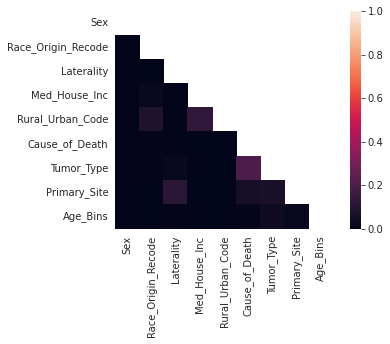

In [147]:
# Heatmap of Matrix
import seaborn as sns
import matplotlib.pyplot as plt



mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
  ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()


In [148]:
# Create data of variables used for machine learning
clean_df = pd.DataFrame(clean_cod[['Sex', 'Race_Origin_Recode', 'Laterality', 'Med_House_Inc', 'Rural_Urban_Code', 'Cause_of_Death', 'Tumor_Type', 'Primary_Site', 'Age_Bins']])

In [149]:
clean_df.head()

,Sex,Race_Origin_Recode,Laterality,Med_House_Inc,Rural_Urban_Code,Cause_of_Death,Tumor_Type,Primary_Site,Age_Bins
2,Male,Non-Hispanic Asian or Pacific Islander,Right - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,Deceased,Glioma unspecified,Frontal lobe,4
33,Female,Non-Hispanic White,Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,Deceased,Embryonal tumors,Cerebellum NOS,4
34,Male,Hispanic (All Races),Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,Survived,Ependymal tumors,Brain NOS,4
45,Male,Non-Hispanic Black,Left - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,Survived,Other astrocytic tumors,Frontal lobe,4
77,Male,Non-Hispanic White,Right - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,Survived,Other astrocytic tumors,Temporal lobe,4


In [150]:
# resetting the DataFrame index
clean_df = clean_df.reset_index()
clean_df.head()

,index,Sex,Race_Origin_Recode,Laterality,Med_House_Inc,Rural_Urban_Code,Cause_of_Death,Tumor_Type,Primary_Site,Age_Bins
0,2,Male,Non-Hispanic Asian or Pacific Islander,Right - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,Deceased,Glioma unspecified,Frontal lobe,4
1,33,Female,Non-Hispanic White,Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,Deceased,Embryonal tumors,Cerebellum NOS,4
2,34,Male,Hispanic (All Races),Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,Survived,Ependymal tumors,Brain NOS,4
3,45,Male,Non-Hispanic Black,Left - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,Survived,Other astrocytic tumors,Frontal lobe,4
4,77,Male,Non-Hispanic White,Right - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,Survived,Other astrocytic tumors,Temporal lobe,4


In [151]:
# Drop index column
clean_df = clean_df.drop(['index'], axis=1)
clean_df.head()

,Sex,Race_Origin_Recode,Laterality,Med_House_Inc,Rural_Urban_Code,Cause_of_Death,Tumor_Type,Primary_Site,Age_Bins
0,Male,Non-Hispanic Asian or Pacific Islander,Right - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,Deceased,Glioma unspecified,Frontal lobe,4
1,Female,Non-Hispanic White,Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,Deceased,Embryonal tumors,Cerebellum NOS,4
2,Male,Hispanic (All Races),Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,Survived,Ependymal tumors,Brain NOS,4
3,Male,Non-Hispanic Black,Left - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,Survived,Other astrocytic tumors,Frontal lobe,4
4,Male,Non-Hispanic White,Right - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,Survived,Other astrocytic tumors,Temporal lobe,4


In [152]:
# Find shape of data
clean_df.shape

(9611, 9)

In [153]:
# Change Cause of Death variable to Binary
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
clean_df['Cause_of_Death'] = labelencoder.fit_transform(clean_df['Cause_of_Death'])
clean_df

,Sex,Race_Origin_Recode,Laterality,Med_House_Inc,Rural_Urban_Code,Cause_of_Death,Tumor_Type,Primary_Site,Age_Bins
0,Male,Non-Hispanic Asian or Pacific Islander,Right - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,0,Glioma unspecified,Frontal lobe,4
1,Female,Non-Hispanic White,Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,0,Embryonal tumors,Cerebellum NOS,4
2,Male,Hispanic (All Races),Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,1,Ependymal tumors,Brain NOS,4
3,Male,Non-Hispanic Black,Left - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,1,Other astrocytic tumors,Frontal lobe,4
4,Male,Non-Hispanic White,Right - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,1,Other astrocytic tumors,Temporal lobe,4
...,...,...,...,...,...,...,...,...,...
9606,Female,Non-Hispanic White,Not a paired site,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",1,Diffuse astrocytoma and anaplastic astrocytoma,Brain stem,4
9607,Female,Non-Hispanic Black,Left - origin of primary,"$45,000 - $49,999",Counties in metropolitan areas of lt 250 thous...,1,Diffuse astrocytoma and anaplastic astrocytoma,Temporal lobe,4
9608,Female,Non-Hispanic White,Paired site: midline tumor,"$75,000+",Counties in metropolitan areas ge 1 million pop,1,Glioma unspecified,Cerebrum,4
9609,Female,Hispanic (All Races),Right - origin of primary,"$60,000 - $64,999",Counties in metropolitan areas of lt 250 thous...,1,Glioblastoma,Parietal lobe,4


In [154]:
# Create a Test Set
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(clean_df, test_size = 0.2, random_state = 42)
train_set.shape, test_set.shape

((7688, 9), (1923, 9))

In [155]:
# Stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [156]:
# Stratify data based on race

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
clean_df['Race_Origin_Recode_Cat'] = labelencoder.fit_transform(clean_df['Race_Origin_Recode'])
clean_df


,Sex,Race_Origin_Recode,Laterality,Med_House_Inc,Rural_Urban_Code,Cause_of_Death,Tumor_Type,Primary_Site,Age_Bins,Race_Origin_Recode_Cat
0,Male,Non-Hispanic Asian or Pacific Islander,Right - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,0,Glioma unspecified,Frontal lobe,4,2
1,Female,Non-Hispanic White,Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,0,Embryonal tumors,Cerebellum NOS,4,4
2,Male,Hispanic (All Races),Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,1,Ependymal tumors,Brain NOS,4,0
3,Male,Non-Hispanic Black,Left - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,1,Other astrocytic tumors,Frontal lobe,4,3
4,Male,Non-Hispanic White,Right - origin of primary,"$75,000+",Counties in metropolitan areas ge 1 million pop,1,Other astrocytic tumors,Temporal lobe,4,4
...,...,...,...,...,...,...,...,...,...,...
9606,Female,Non-Hispanic White,Not a paired site,"$65,000 - $69,999","Counties in metropolitan areas of 250,000 to 1...",1,Diffuse astrocytoma and anaplastic astrocytoma,Brain stem,4,4
9607,Female,Non-Hispanic Black,Left - origin of primary,"$45,000 - $49,999",Counties in metropolitan areas of lt 250 thous...,1,Diffuse astrocytoma and anaplastic astrocytoma,Temporal lobe,4,3
9608,Female,Non-Hispanic White,Paired site: midline tumor,"$75,000+",Counties in metropolitan areas ge 1 million pop,1,Glioma unspecified,Cerebrum,4,4
9609,Female,Hispanic (All Races),Right - origin of primary,"$60,000 - $64,999",Counties in metropolitan areas of lt 250 thous...,1,Glioblastoma,Parietal lobe,4,0


In [157]:
# Apply split to training and testing data for Race Categories
for train_index, test_index in split.split(X=clean_df, y=clean_df['Race_Origin_Recode_Cat']):
    strat_train_set = clean_df.loc[train_index]
    strat_test_set = clean_df.loc[test_index]


In [158]:
# Check split of test set
strat_test_set['Race_Origin_Recode_Cat'].value_counts() / len(strat_test_set)

4    0.553822
0    0.257930
3    0.106604
2    0.073843
1    0.007800
Name: Race_Origin_Recode_Cat, dtype: float64

In [159]:
# Remove Race Categories
for set_ in (strat_train_set, strat_test_set):
    set_.drop('Race_Origin_Recode_Cat', axis=1, inplace=True)

In [160]:
strat_train_set.shape, strat_test_set.shape

((7688, 9), (1923, 9))

In [161]:
# Reset index of test set
strat_test_set = strat_test_set.reset_index()
strat_test_set

,index,Sex,Race_Origin_Recode,Laterality,Med_House_Inc,Rural_Urban_Code,Cause_of_Death,Tumor_Type,Primary_Site,Age_Bins
0,1128,Male,Hispanic (All Races),Not a paired site,"$45,000 - $49,999",Nonmetropolitan counties not adjacent to a met...,1,Other astrocytic tumors,Cerebellum NOS,1
1,893,Female,Non-Hispanic Asian or Pacific Islander,Left - origin of primary,"$75,000+","Counties in metropolitan areas of 250,000 to 1...",1,Ependymal tumors,Temporal lobe,4
2,5529,Male,Non-Hispanic White,Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,1,Glioma unspecified,Cerebellum NOS,2
3,6058,Female,Non-Hispanic Black,Not a paired site,"$60,000 - $64,999",Counties in metropolitan areas ge 1 million pop,0,Embryonal tumors,Ventricle NOS,1
4,8584,Male,Non-Hispanic White,Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,0,Embryonal tumors,Cerebellum NOS,3
...,...,...,...,...,...,...,...,...,...,...
1918,6667,Female,Non-Hispanic White,Left - origin of primary,"< $35,000",Nonmetropolitan counties not adjacent to a met...,0,Embryonal tumors,Cerebrum,1
1919,4150,Male,Non-Hispanic White,Not a paired site,"$65,000 - $69,999",Counties in metropolitan areas ge 1 million pop,1,Embryonal tumors,Brain NOS,1
1920,6192,Male,Non-Hispanic White,Not a paired site,"$45,000 - $49,999","Counties in metropolitan areas of 250,000 to 1...",1,Other astrocytic tumors,Cerebellum NOS,2
1921,4438,Male,Hispanic (All Races),Not a paired site,"$50,000 - $54,999","Counties in metropolitan areas of 250,000 to 1...",1,Diffuse astrocytoma and anaplastic astrocytoma,Brain stem,4


In [162]:
# Drop index column
strat_test_set = strat_test_set.drop(['index'], axis=1)
strat_test_set.head()

,Sex,Race_Origin_Recode,Laterality,Med_House_Inc,Rural_Urban_Code,Cause_of_Death,Tumor_Type,Primary_Site,Age_Bins
0,Male,Hispanic (All Races),Not a paired site,"$45,000 - $49,999",Nonmetropolitan counties not adjacent to a met...,1,Other astrocytic tumors,Cerebellum NOS,1
1,Female,Non-Hispanic Asian or Pacific Islander,Left - origin of primary,"$75,000+","Counties in metropolitan areas of 250,000 to 1...",1,Ependymal tumors,Temporal lobe,4
2,Male,Non-Hispanic White,Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,1,Glioma unspecified,Cerebellum NOS,2
3,Female,Non-Hispanic Black,Not a paired site,"$60,000 - $64,999",Counties in metropolitan areas ge 1 million pop,0,Embryonal tumors,Ventricle NOS,1
4,Male,Non-Hispanic White,Not a paired site,"$75,000+",Counties in metropolitan areas ge 1 million pop,0,Embryonal tumors,Cerebellum NOS,3


In [163]:
# Reset index of train set
strat_train_set = strat_train_set.reset_index()
strat_train_set.head()

,index,Sex,Race_Origin_Recode,Laterality,Med_House_Inc,Rural_Urban_Code,Cause_of_Death,Tumor_Type,Primary_Site,Age_Bins
0,2170,Female,Non-Hispanic White,Left - origin of primary,"$60,000 - $64,999","Counties in metropolitan areas of 250,000 to 1...",1,Oligodendroglioma,Parietal lobe,3
1,2615,Female,Non-Hispanic Black,Not a paired site,"$60,000 - $64,999",Counties in metropolitan areas ge 1 million pop,1,Embryonal tumors,Cerebellum NOS,2
2,3628,Male,Hispanic (All Races),Not a paired site,"$65,000 - $69,999",Counties in metropolitan areas ge 1 million pop,1,Other astrocytic tumors,Brain NOS,1
3,9099,Female,Non-Hispanic Black,"Bilateral, single primary","$75,000+",Counties in metropolitan areas ge 1 million pop,0,Diffuse astrocytoma and anaplastic astrocytoma,Cerebrum,4
4,1247,Female,Non-Hispanic White,Left - origin of primary,"$60,000 - $64,999",Counties in metropolitan areas of lt 250 thous...,1,Ependymal tumors,Parietal lobe,1


In [164]:
# Drop index column
strat_train_set = strat_train_set.drop(['index'], axis=1)
strat_train_set.head()

,Sex,Race_Origin_Recode,Laterality,Med_House_Inc,Rural_Urban_Code,Cause_of_Death,Tumor_Type,Primary_Site,Age_Bins
0,Female,Non-Hispanic White,Left - origin of primary,"$60,000 - $64,999","Counties in metropolitan areas of 250,000 to 1...",1,Oligodendroglioma,Parietal lobe,3
1,Female,Non-Hispanic Black,Not a paired site,"$60,000 - $64,999",Counties in metropolitan areas ge 1 million pop,1,Embryonal tumors,Cerebellum NOS,2
2,Male,Hispanic (All Races),Not a paired site,"$65,000 - $69,999",Counties in metropolitan areas ge 1 million pop,1,Other astrocytic tumors,Brain NOS,1
3,Female,Non-Hispanic Black,"Bilateral, single primary","$75,000+",Counties in metropolitan areas ge 1 million pop,0,Diffuse astrocytoma and anaplastic astrocytoma,Cerebrum,4
4,Female,Non-Hispanic White,Left - origin of primary,"$60,000 - $64,999",Counties in metropolitan areas of lt 250 thous...,1,Ependymal tumors,Parietal lobe,1


In [165]:
strat_train_set['Cause_of_Death'].value_counts()

1    5608
0    2080
Name: Cause_of_Death, dtype: int64

In [167]:
# balance the number of survived and deceased
from sklearn.utils import resample
df_majority = strat_train_set[strat_train_set.Cause_of_Death == 1]
df_minority = strat_train_set[strat_train_set.Cause_of_Death == 0]
df_minority_upsampled = resample(df_minority, replace = True, n_samples = 5608, random_state = 100)

# Combine majority class with upsampled minority class
strat_train_set_upsampled = pd. concat([df_majority, df_minority_upsampled])


In [168]:
strat_train_set_upsampled['Cause_of_Death'].value_counts()

1    5608
0    5608
Name: Cause_of_Death, dtype: int64

In [169]:
# Get dummies for categorical data
prepared_train = pd.get_dummies(strat_train_set_upsampled)
prepared_test = pd.get_dummies(strat_test_set)

In [170]:
prepared_train.head()


,Cause_of_Death,Sex_Female,Sex_Male,Race_Origin_Recode_Hispanic (All Races),Race_Origin_Recode_Non-Hispanic American Indian/Alaska Native,Race_Origin_Recode_Non-Hispanic Asian or Pacific Islander,Race_Origin_Recode_Non-Hispanic Black,Race_Origin_Recode_Non-Hispanic White,"Laterality_Bilateral, single primary",Laterality_Left - origin of primary,...,Primary_Site_Frontal lobe,Primary_Site_Occipital lobe,Primary_Site_Overlapping lesion of brain,Primary_Site_Parietal lobe,Primary_Site_Temporal lobe,Primary_Site_Ventricle NOS,Age_Bins_1,Age_Bins_2,Age_Bins_3,Age_Bins_4
0,1,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
1,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,1,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
6,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [171]:
prepared_test.head()

,Cause_of_Death,Sex_Female,Sex_Male,Race_Origin_Recode_Hispanic (All Races),Race_Origin_Recode_Non-Hispanic American Indian/Alaska Native,Race_Origin_Recode_Non-Hispanic Asian or Pacific Islander,Race_Origin_Recode_Non-Hispanic Black,Race_Origin_Recode_Non-Hispanic White,"Laterality_Bilateral, single primary",Laterality_Left - origin of primary,...,Primary_Site_Frontal lobe,Primary_Site_Occipital lobe,Primary_Site_Overlapping lesion of brain,Primary_Site_Parietal lobe,Primary_Site_Temporal lobe,Primary_Site_Ventricle NOS,Age_Bins_1,Age_Bins_2,Age_Bins_3,Age_Bins_4
0,1,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,1,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
2,1,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [172]:
# Find shape of training and testing data
print(prepared_train.shape)
print(prepared_test.shape)

(11216, 59)
(1923, 59)


In [173]:
# Create X & Y train / test sets
X_train = prepared_train.drop('Cause_of_Death', axis=1)
y_train = prepared_train['Cause_of_Death']
X_test = prepared_test.drop('Cause_of_Death', axis=1)
y_test = prepared_test['Cause_of_Death']

In [174]:
# Code from https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/
# get a list of models to evaluate
def get_models():
 models = dict()
 models['lr'] = LogisticRegression()
 models['knn'] = KNeighborsClassifier()
 models['cart'] = DecisionTreeClassifier()
 models['rf'] = RandomForestClassifier()
 models['svm'] = SVC()
 models['bayes'] = GaussianNB()
 return models

In [175]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores

>lr 0.713 (0.013)
>knn 0.772 (0.014)
>cart 0.849 (0.011)
>rf 0.868 (0.010)
>svm 0.783 (0.011)
>bayes 0.693 (0.013)


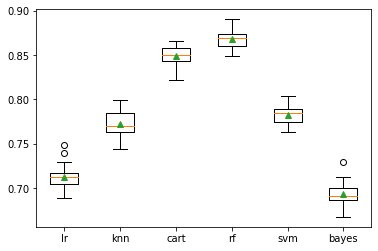

In [176]:
# compare standalone models for binary classification
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from matplotlib import pyplot

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X_train, y_train)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [188]:
# make a prediction with a stacking ensemble
from sklearn.ensemble import StackingClassifier

# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('rf', RandomForestClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X_train, y_train)
# make predictions
data = X_test
y_predict = model.predict(data)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [189]:
from sklearn import metrics
print('Accuracy of the model: ', metrics.accuracy_score(y_test, y_predict))

Accuracy of the model:  0.7597503900156006


In [190]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_predict)
cf_matrix

array([[ 252,  286],
       [ 176, 1209]])

In [191]:
# code from https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.

    Arguments
    ---------
    cf:            confusion matrix to be passed in

    group_names:   List of strings that represent the labels row by row to be shown in each square.

    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'

    count:         If True, show the raw number in the confusion matrix. Default is True.

    normalize:     If True, show the proportions for each category. Default is True.

    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.

    xyticks:       If True, show x and y ticks. Default is True.

    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.

    sum_stats:     If True, display summary statistics below the figure. Default is True.

    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.

    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.

    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)
  

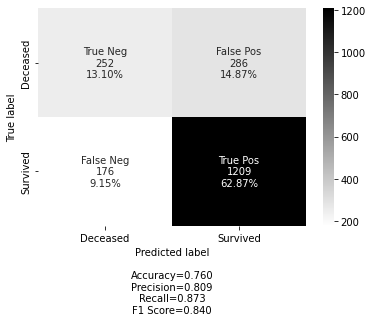

In [192]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
categories = ['Deceased', 'Survived']
make_confusion_matrix(cf_matrix, group_names = labels, categories = categories, cmap = 'binary')

In [214]:
y_predict = pd.DataFrame(y_predict)

In [215]:
y_predict

,0
0,1
1,1
2,1
3,0
4,1
...,...
1918,1
1919,1
1920,1
1921,0


In [216]:
pred_df = pd.concat([X_test, y_test, y_predict], axis = 1)

In [217]:
pred_df

,Sex_Female,Sex_Male,Race_Origin_Recode_Hispanic (All Races),Race_Origin_Recode_Non-Hispanic American Indian/Alaska Native,Race_Origin_Recode_Non-Hispanic Asian or Pacific Islander,Race_Origin_Recode_Non-Hispanic Black,Race_Origin_Recode_Non-Hispanic White,"Laterality_Bilateral, single primary",Laterality_Left - origin of primary,Laterality_Not a paired site,...,Primary_Site_Overlapping lesion of brain,Primary_Site_Parietal lobe,Primary_Site_Temporal lobe,Primary_Site_Ventricle NOS,Age_Bins_1,Age_Bins_2,Age_Bins_3,Age_Bins_4,Cause_of_Death,0
0,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
1,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,1
2,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1919,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,1
1920,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,1
1921,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [220]:
pred_df.rename(columns = {0:'Cause_of_Death_Predict'}, inplace = True)

In [221]:
pred_df

,Sex_Female,Sex_Male,Race_Origin_Recode_Hispanic (All Races),Race_Origin_Recode_Non-Hispanic American Indian/Alaska Native,Race_Origin_Recode_Non-Hispanic Asian or Pacific Islander,Race_Origin_Recode_Non-Hispanic Black,Race_Origin_Recode_Non-Hispanic White,"Laterality_Bilateral, single primary",Laterality_Left - origin of primary,Laterality_Not a paired site,...,Primary_Site_Overlapping lesion of brain,Primary_Site_Parietal lobe,Primary_Site_Temporal lobe,Primary_Site_Ventricle NOS,Age_Bins_1,Age_Bins_2,Age_Bins_3,Age_Bins_4,Cause_of_Death,Cause_of_Death_Predict
0,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,1
1,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,1,1
2,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,1
3,1,0,0,0,0,1,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1919,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,1
1920,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,1
1921,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [224]:
incorrect_pred = pred_df[pred_df.Cause_of_Death != pred_df.Cause_of_Death_Predict]

In [225]:
incorrect_pred

,Sex_Female,Sex_Male,Race_Origin_Recode_Hispanic (All Races),Race_Origin_Recode_Non-Hispanic American Indian/Alaska Native,Race_Origin_Recode_Non-Hispanic Asian or Pacific Islander,Race_Origin_Recode_Non-Hispanic Black,Race_Origin_Recode_Non-Hispanic White,"Laterality_Bilateral, single primary",Laterality_Left - origin of primary,Laterality_Not a paired site,...,Primary_Site_Overlapping lesion of brain,Primary_Site_Parietal lobe,Primary_Site_Temporal lobe,Primary_Site_Ventricle NOS,Age_Bins_1,Age_Bins_2,Age_Bins_3,Age_Bins_4,Cause_of_Death,Cause_of_Death_Predict
4,0,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,1
5,1,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,1,0,0,0,1
11,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
14,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1
19,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1909,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,1,0
1912,0,1,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
1917,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,1
1918,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [226]:
def undummify(df, prefix_sep="_"):
    cols2collapse = {
        item.split(prefix_sep)[0]: (prefix_sep in item) for item in df.columns
    }
    series_list = []
    for col, needs_to_collapse in cols2collapse.items():
        if needs_to_collapse:
            undummified = (
                df.filter(like=col)
                .idxmax(axis=1)
                .apply(lambda x: x.split(prefix_sep, maxsplit=1)[1])
                .rename(col)
            )
            series_list.append(undummified)
        else:
            series_list.append(df[col])
    undummified_df = pd.concat(series_list, axis=1)
    return undummified_df


In [228]:
undum_pred = undummify(incorrect_pred)

In [232]:
undum_pred.head()

,Sex,Race,Laterality,Med,Rural,Tumor,Primary,Age,Cause
4,Male,Origin_Recode_Non-Hispanic White,Not a paired site,"House_Inc_$75,000+",Urban_Code_Counties in metropolitan areas ge 1...,Type_Embryonal tumors,Site_Cerebellum NOS,Bins_3,of_Death_Predict
5,Female,Origin_Recode_Non-Hispanic White,Left - origin of primary,"House_Inc_$50,000 - $54,999",Urban_Code_Counties in metropolitan areas of 2...,Type_Diffuse astrocytoma and anaplastic astroc...,Site_Overlapping lesion of brain,Bins_2,of_Death_Predict
11,Female,Origin_Recode_Hispanic (All Races),Not a paired site,"House_Inc_$65,000 - $69,999",Urban_Code_Counties in metropolitan areas ge 1...,Type_Diffuse astrocytoma and anaplastic astroc...,Site_Brain NOS,Bins_1,of_Death
14,Female,Origin_Recode_Non-Hispanic Black,Not a paired site,"House_Inc_$35,000 - $39,999",Urban_Code_Nonmetropolitan counties adjacent t...,Type_Glioma unspecified,Site_Brain stem,Bins_4,of_Death_Predict
19,Female,Origin_Recode_Non-Hispanic White,Not a paired site,"House_Inc_$65,000 - $69,999",Urban_Code_Nonmetropolitan counties adjacent t...,Type_Ependymal tumors,Site_Brain stem,Bins_1,of_Death_Predict


In [231]:
undum_pred.Sex.value_counts(normalize=True)

Male      0.551948
Female    0.448052
Name: Sex, dtype: float64

In [233]:
undum_pred.Race.value_counts(normalize=True)

Origin_Recode_Non-Hispanic White                            0.517316
Origin_Recode_Hispanic (All Races)                          0.294372
Origin_Recode_Non-Hispanic Black                            0.114719
Origin_Recode_Non-Hispanic Asian or Pacific Islander        0.071429
Origin_Recode_Non-Hispanic American Indian/Alaska Native    0.002165
Name: Race, dtype: float64

In [234]:
undum_pred.Laterality.value_counts(normalize=True)

Not a paired  site                                       0.727273
Left - origin of primary                                 0.121212
Right - origin of primary                                0.121212
Paired site, but no information concerning laterality    0.010823
Paired site: midline tumor                               0.008658
Bilateral, single primary                                0.008658
Only one side - side unspecified                         0.002165
Name: Laterality, dtype: float64

In [235]:
undum_pred.Med.value_counts(normalize=True)

House_Inc_$75,000+             0.285714
House_Inc_$65,000 - $69,999    0.199134
House_Inc_$60,000 - $64,999    0.164502
House_Inc_$70,000 - $74,999    0.086580
House_Inc_$50,000 - $54,999    0.075758
House_Inc_$55,000 - $59,999    0.075758
House_Inc_$45,000 - $49,999    0.058442
House_Inc_$40,000 - $44,999    0.030303
House_Inc_$35,000 - $39,999    0.015152
House_Inc_< $35,000            0.008658
Name: Med, dtype: float64

In [236]:
undum_pred.Rural.value_counts(normalize=True)

Urban_Code_Counties in metropolitan areas ge 1 million pop                 0.608225
Urban_Code_Counties in metropolitan areas of 250,000 to 1 million pop      0.192641
Urban_Code_Counties in metropolitan areas of lt 250 thousand pop           0.086580
Urban_Code_Nonmetropolitan counties adjacent to a metropolitan area        0.062771
Urban_Code_Nonmetropolitan counties not adjacent to a metropolitan area    0.049784
Name: Rural, dtype: float64

In [237]:
undum_pred.Tumor.value_counts(normalize=True)

Type_Embryonal tumors                                  0.398268
Type_Glioma unspecified                                0.153680
Type_Diffuse astrocytoma and anaplastic astrocytoma    0.127706
Type_Ependymal tumors                                  0.101732
Type_Other astrocytic tumors                           0.058442
Type_Other Malignant Brain ONS                         0.045455
Type_Glioblastoma                                      0.043290
Type_Choroid plexus tumors                             0.025974
Type_Oligodendroglioma                                 0.015152
Type_Diffuse midline glioma mutant                     0.010823
Type_Oligoastrocytoma                                  0.008658
Type_Other                                             0.006494
Type_Neuronal and mixed neuronal glial tumors          0.002165
Type_Astroblastoma                                     0.002165
Name: Tumor, dtype: float64

In [238]:
undum_pred.Primary.value_counts(normalize=True)

Site_Brain stem                     0.272727
Site_Cerebellum NOS                 0.264069
Site_Brain NOS                      0.114719
Site_Cerebrum                       0.080087
Site_Ventricle NOS                  0.077922
Site_Overlapping lesion of brain    0.054113
Site_Frontal lobe                   0.051948
Site_Parietal lobe                  0.043290
Site_Temporal lobe                  0.030303
Site_Occipital lobe                 0.010823
Name: Primary, dtype: float64

In [239]:
undum_pred.Age.value_counts(normalize=True)

Bins_1    0.400433
Bins_2    0.235931
Bins_4    0.183983
Bins_3    0.179654
Name: Age, dtype: float64